Discover users who are accessing our curriculum pages way beyond the end of their codeup time. What would the dataframe look like? Use time series method for detecting anomalies, like exponential moving average with %b.

In [1]:
import itertools
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from numpy import linspace, loadtxt, ones, convolve
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd
import collections
import math
from sklearn import metrics
from random import randint
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('anonymized-curriculum-access.txt', sep=" ", header=None, index_col=0, parse_dates=True)

In [3]:
df = df.dropna()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 372441 entries, 2018-01-26 to 2019-11-19
Data columns (total 5 columns):
1    372441 non-null object
2    372441 non-null object
3    372441 non-null int64
4    372441 non-null float64
5    372441 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 17.0+ MB


In [5]:
df.reset_index(inplace = True)

In [6]:
df.rename(columns={0: "date", 1: "time", 2 : 'page_accessed', 3: 'id', 4 : 'group', 5: 'ip_add' }, inplace = True)

In [7]:
df.head()

,date,time,page_accessed,id,group,ip_add
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


In [8]:
df.group.value_counts()

29.0    35969
24.0    35039
33.0    34433
22.0    28875
23.0    28056
32.0    26801
26.0    26760
25.0    25233
31.0    22665
28.0    20677
27.0    20198
34.0    15519
51.0    10835
14.0     9069
1.0      8877
21.0     7181
17.0     3792
52.0     2896
13.0     2610
8.0      1671
18.0     1603
19.0     1142
16.0      740
15.0      691
7.0       461
12.0      270
11.0      204
2.0        93
6.0        72
9.0         5
4.0         4
Name: group, dtype: int64

In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372441 entries, 0 to 372440
Data columns (total 6 columns):
date             372441 non-null datetime64[ns]
time             372441 non-null object
page_accessed    372441 non-null object
id               372441 non-null int64
group            372441 non-null float64
ip_add           372441 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 17.0+ MB


In [11]:
df = df.set_index('date')
df.head()

,time,page_accessed,id,group,ip_add
date,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61
2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61


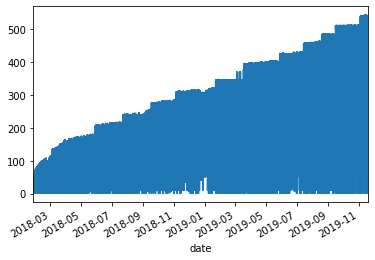

In [12]:
df.id.plot()

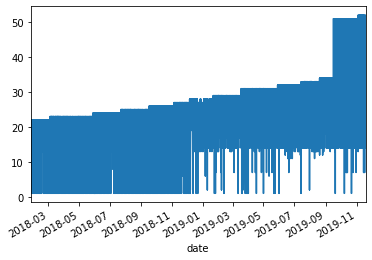

In [13]:
df.group.plot()

In [14]:
df.id.nunique()

497

In [15]:
df.group.nunique()

31

In [16]:
df.id.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  49,  50,  51,  52,  53,
        55,  56,  57,  60,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        75,  76,  77,  80,  81,  82,  83,  84,  85,  87,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 101, 102, 104, 105, 106, 107,
       108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
       162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
       190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 20

In [17]:
df.group.unique()

array([ 8., 22., 21.,  1., 16., 18., 19., 13., 14., 15.,  7.,  4., 12.,
       17., 23.,  2.,  9., 11., 24., 25., 26.,  6., 27., 28., 29., 31.,
       32., 33., 34., 51., 52.])

In [18]:
df.ip_add.unique()

array(['97.105.19.61', '71.137.146.71', '209.205.123.242', ...,
       '70.121.194.226', '72.169.81.79', '205.251.150.218'], dtype=object)

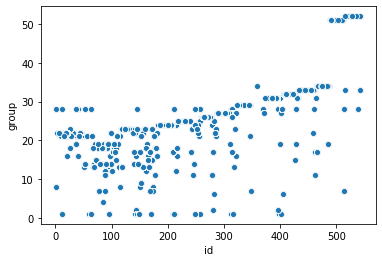

In [19]:
sns.scatterplot(x = df.id, y = df.group)

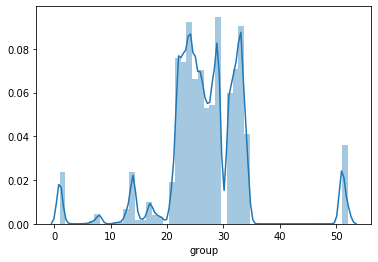

In [20]:
sns.distplot(df.group)

In [21]:
df['dates'] = df.index # created new column that replicates the index 

In [22]:
grouped_by_cohort = df.groupby('group')

In [23]:
minimums = grouped_by_cohort.dates.min()
maximums = grouped_by_cohort.dates.max()
minimums

group
1.0    2018-01-26
2.0    2018-03-19
4.0    2018-02-04
6.0    2018-10-16
7.0    2018-01-31
8.0    2018-01-26
9.0    2018-03-22
11.0   2018-05-07
12.0   2018-02-15
13.0   2018-01-26
14.0   2018-01-28
15.0   2018-01-30
16.0   2018-01-26
17.0   2018-02-15
18.0   2018-01-26
19.0   2018-01-26
21.0   2018-01-26
22.0   2018-01-26
23.0   2018-03-05
24.0   2018-05-29
25.0   2018-07-23
26.0   2018-09-17
27.0   2018-11-05
28.0   2018-12-06
29.0   2019-01-22
31.0   2019-03-18
32.0   2019-05-29
33.0   2019-07-15
34.0   2019-08-20
51.0   2019-09-16
52.0   2019-11-04
Name: dates, dtype: datetime64[ns]

In [24]:
diffs = maximums - minimums
diffs.head()


group
1.0   634 days
2.0   499 days
4.0     0 days
6.0   208 days
7.0   655 days
Name: dates, dtype: timedelta64[ns]

In [25]:
diffs = pd.DataFrame(diffs)
diffs["cohort_id"] = diffs.index
diffs

,dates,cohort_id
group,,
1.0,634 days,1.0
2.0,499 days,2.0
4.0,0 days,4.0
6.0,208 days,6.0
7.0,655 days,7.0
8.0,313 days,8.0
9.0,0 days,9.0
11.0,460 days,11.0
12.0,557 days,12.0


In [26]:
type(diffs)

pandas.core.frame.DataFrame

In [27]:
df = df.merge(diffs, left_on="group", right_on="cohort_id")
df.head(10)

,time,page_accessed,id,group,ip_add,dates_x,dates_y,cohort_id
0,09:55:03,/,1,8.0,97.105.19.61,2018-01-26,313 days,8.0
1,09:56:02,java-ii,1,8.0,97.105.19.61,2018-01-26,313 days,8.0
2,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,2018-01-26,313 days,8.0
3,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,2018-01-26,313 days,8.0
4,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,2018-01-26,313 days,8.0
5,11:26:13,java-i,1,8.0,97.105.19.61,2018-01-26,313 days,8.0
6,11:43:17,mkdocs/search_index.json,1,8.0,97.105.19.61,2018-01-26,313 days,8.0
7,07:49:25,teams/13,1,8.0,72.177.226.58,2018-01-27,313 days,8.0
8,11:41:51,javascript-i/conditionals,1,8.0,97.105.19.61,2018-01-29,313 days,8.0
9,11:43:08,javascript-i/loops,1,8.0,97.105.19.61,2018-01-29,313 days,8.0


In [28]:
df = df.set_index('dates_x')
df.head()

,time,page_accessed,id,group,ip_add,dates_y,cohort_id
dates_x,,,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61,313 days,8.0
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,313 days,8.0
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,313 days,8.0
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,313 days,8.0
2018-01-26,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,313 days,8.0


In [29]:
df['dates'] = df.index
df.head()

,time,page_accessed,id,group,ip_add,dates_y,cohort_id,dates
dates_x,,,,,,,,
2018-01-26,09:55:03,/,1,8.0,97.105.19.61,313 days,8.0,2018-01-26
2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,313 days,8.0,2018-01-26
2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,313 days,8.0,2018-01-26
2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,313 days,8.0,2018-01-26
2018-01-26,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,313 days,8.0,2018-01-26


In [30]:
df.groupby('group')['dates'].min()

group
1.0    2018-01-26
2.0    2018-03-19
4.0    2018-02-04
6.0    2018-10-16
7.0    2018-01-31
8.0    2018-01-26
9.0    2018-03-22
11.0   2018-05-07
12.0   2018-02-15
13.0   2018-01-26
14.0   2018-01-28
15.0   2018-01-30
16.0   2018-01-26
17.0   2018-02-15
18.0   2018-01-26
19.0   2018-01-26
21.0   2018-01-26
22.0   2018-01-26
23.0   2018-03-05
24.0   2018-05-29
25.0   2018-07-23
26.0   2018-09-17
27.0   2018-11-05
28.0   2018-12-06
29.0   2019-01-22
31.0   2019-03-18
32.0   2019-05-29
33.0   2019-07-15
34.0   2019-08-20
51.0   2019-09-16
52.0   2019-11-04
Name: dates, dtype: datetime64[ns]

Discover users who are accessing our curriculum pages way beyond the end of their codeup time. What would the dataframe look like? Use time series method for detecting anomalies, like exponential moving average with %b.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 372441 entries, 2018-01-26 to 2019-11-19
Data columns (total 8 columns):
time             372441 non-null object
page_accessed    372441 non-null object
id               372441 non-null int64
group            372441 non-null float64
ip_add           372441 non-null object
dates_y          372441 non-null timedelta64[ns]
cohort_id        372441 non-null float64
dates            372441 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(3), timedelta64[ns](1)
memory usage: 25.6+ MB


In [32]:
df.groupby(['group', 'dates_x', 'id']).count()

time  page_accessed  ip_add  dates_y  cohort_id  dates
group dates_x    id                                                         
1.0   2018-01-26 11     19             19      19       19         19     19
      2018-01-29 11     16             16      16       16         16     16
                 60      3              3       3        3          3      3
                 64      3              3       3        3          3      3
      2018-01-30 11      8              8       8        8          8      8
                 64      4              4       4        4          4      4
      2018-01-31 11      8              8       8        8          8      8
                 64      9              9       9        9          9      9
      2018-02-01 11      9              9       9        9          9      9
      2018-02-02 11     14             14      14       14         14     14
      2018-02-05 64     13             13      13       13         13     13
      2018-02-06 11     16             16      16       16         16     16
                 64      4              4       4        4          4      4
      2018-02-07 60      7              7       7        7          7      7
                 64     17             17      17       17         17     17
      2018-02-08 11      1              1       1        1          1      1
                 60      3              3       3        3          3      3
                 64      7              7       7        7          7      7
      2018-02-10 11      2              2       2        2          2      2
                 95      8              8       8        8          8      8
      2018-02-12 11     18             18      18       18         18     18
                 64     10             10      10       10         10     10
      2018-02-13 11     16             16      16       16         16     16
      2018-02-14 11      2              2       2        2          2      2
                 64      2              2       2        2          2      2
      2018-02-15 60      7              7       7        7          7      7
                 64     10             10      10       10         10     10
      2018-02-16 11      1              1       1        1          1      1
                 60      6              6       6        6          6      6
                 64     13             13      13       13         13     13
...                    ...            ...     ...      ...        ...    ...
52.0  2019-11-18 533     8              8       8        8          8      8
                 534     4              4       4        4          4      4
                 535    12             12      12       12         12     12
                 536    22             22      22       22         22     22
                 537    19             19      19       19         19     19
                 538    17             17      17       17         17     17
                 540    34             34      34       34         34     34
                 541    32             32      32       32         32     32
                 542     5              5       5        5          5      5
      2019-11-19 516     4              4       4        4          4      4
                 517     2              2       2        2          2      2
                 518     1              1       1        1          1      1
                 519     1              1       1        1          1      1
                 520     4              4       4        4          4      4
                 521     2              2       2        2          2      2
                 522     7              7       7        7          7      7
                 524     4              4       4        4          4      4
                 526     1              1       1        1          1      1
                 527     1              1       1        1          1      1
                 5

In [33]:
df.groupby(['dates_x', 'id', 'group']).count()

time  page_accessed  ip_add  dates_y  cohort_id  dates
dates_x    id  group                                                        
2018-01-26 1   8.0       7              7       7        7          7      7
           2   22.0     17             17      17       17         17     17
           3   22.0     22             22      22       22         22     22
           4   22.0     14             14      14       14         14     14
           5   22.0     14             14      14       14         14     14
           6   22.0     21             21      21       21         21     21
           7   22.0     35             35      35       35         35     35
           8   22.0      2              2       2        2          2      2
           9   22.0      2              2       2        2          2      2
           10  21.0     31             31      31       31         31     31
           11  1.0      19             19      19       19         19     19
           12  22.0     10             10      10       10         10     10
           13  22.0     15             15      15       15         15     15
           14  22.0      3              3       3        3          3      3
           15  21.0     32             32      32       32         32     32
           16  21.0      7              7       7        7          7      7
           17  21.0      6              6       6        6          6      6
           18  22.0     15             15      15       15         15     15
           19  22.0     67             67      67       67         67     67
           20  22.0      8              8       8        8          8      8
           21  16.0      2              2       2        2          2      2
           22  21.0      3              3       3        3          3      3
           23  22.0     12             12      12       12         12     12
           24  21.0      2              2       2        2          2      2
           25  22.0      5              5       5        5          5      5
           26  18.0      3              3       3        3          3      3
           27  21.0      9              9       9        9          9      9
           28  21.0     14             14      14       14         14     14
           29  22.0      5              5       5        5          5      5
           30  22.0     15             15      15       15         15     15
...                    ...            ...     ...      ...        ...    ...
2019-11-19 483 34.0      1              1       1        1          1      1
           485 34.0      7              7       7        7          7      7
           490 51.0      3              3       3        3          3      3
           491 51.0      2              2       2        2          2      2
           499 51.0      2              2       2        2          2      2
           503 51.0      1              1       1        1          1      1
           508 51.0      1              1       1        1          1      1
           510 51.0      1              1       1        1          1      1
           515 33.0     11             11      11       11         11     11
           516 52.0      4              4       4        4          4      4
           517 52.0      2              2       2        2          2      2
           518 52.0      1              1       1        1          1      1
           519 52.0      1              1       1        1          1      1
           520 52.0      4              4       4        4          4      4
           521 52.0      2              2       2        2          2      2
           522 52.0      7              7       7        7          7      7
           524 52.0      4              4       4        4          4      4
           526 52.0      1              1       1        1          1      1
           527 52.0      1              1       1        1          1      1
           528 52.

In [34]:
df.groupby(['dates_x', 'group']).count()

time  page_accessed   id  ip_add  dates_y  cohort_id  dates
dates_x    group                                                             
2018-01-26 1.0      19             19   19      19       19         19     19
           8.0       7              7    7       7        7          7      7
           13.0      1              1    1       1        1          1      1
           16.0      3              3    3       3        3          3      3
           18.0      3              3    3       3        3          3      3
           19.0      4              4    4       4        4          4      4
           21.0    173            173  173     173      173        173    173
           22.0    323            323  323     323      323        323    323
2018-01-27 8.0       1              1    1       1        1          1      1
           13.0     41             41   41      41       41         41     41
           21.0    135            135  135     135      135        135    135
           22.0     53             53   53      53       53         53     53
2018-01-28 13.0     16             16   16      16       16         16     16
           14.0      7              7    7       7        7          7      7
           21.0     37             37   37      37       37         37     37
           22.0    108            108  108     108      108        108    108
2018-01-29 1.0      22             22   22      22       22         22     22
           8.0       6              6    6       6        6          6      6
           13.0      2              2    2       2        2          2      2
           14.0     11             11   11      11       11         11     11
           16.0     14             14   14      14       14         14     14
           18.0      3              3    3       3        3          3      3
           21.0    292            292  292     292      292        292    292
           22.0    433            433  433     433      433        433    433
2018-01-30 1.0      12             12   12      12       12         12     12
           8.0       5              5    5       5        5          5      5
           13.0     17             17   17      17       17         17     17
           14.0     48             48   48      48       48         48     48
           15.0     15             15   15      15       15         15     15
           16.0      3              3    3       3        3          3      3
...                ...            ...  ...     ...      ...        ...    ...
2019-11-16 28.0      7              7    7       7        7          7      7
           33.0     26             26   26      26       26         26     26
           34.0      6              6    6       6        6          6      6
           51.0     12             12   12      12       12         12     12
           52.0     61             61   61      61       61         61     61
2019-11-17 7.0       1              1    1       1        1          1      1
           32.0      1              1    1       1        1          1      1
           33.0     28             28   28      28       28         28     28
           34.0     51             51   51      51       51         51     51
           51.0      3              3    3       3        3          3      3
           52.0    101            101  101     101      101        101    101
2019-11-18 14.0      8              8    8       8        8          8      8
           17.0     17             17   17      17       17         17     17
           26.0     70             70   70      70       70         70     70
           27.0     12             12   12      12       12         12     12
           28.0     84             84   84      84       84         84     84
           29.0     32             32   32      32       32         32     32
           32.0     29             29   29      29       29         29     29
           33.0    193            193  1

In [35]:
df.groupby('id').count()

,time,page_accessed,group,ip_add,dates_y,cohort_id,dates
id,,,,,,,
1,4266,4266,4266,4266,4266,4266,4266
2,1541,1541,1541,1541,1541,1541,1541
3,1562,1562,1562,1562,1562,1562,1562
4,692,692,692,692,692,692,692
5,1701,1701,1701,1701,1701,1701,1701
6,1408,1408,1408,1408,1408,1408,1408
7,1803,1803,1803,1803,1803,1803,1803
8,483,483,483,483,483,483,483
9,585,585,585,585,585,585,585


In [36]:
df_gb = df.groupby(['dates_x','group']).count()
df_gb

time  page_accessed   id  ip_add  dates_y  cohort_id  dates
dates_x    group                                                             
2018-01-26 1.0      19             19   19      19       19         19     19
           8.0       7              7    7       7        7          7      7
           13.0      1              1    1       1        1          1      1
           16.0      3              3    3       3        3          3      3
           18.0      3              3    3       3        3          3      3
           19.0      4              4    4       4        4          4      4
           21.0    173            173  173     173      173        173    173
           22.0    323            323  323     323      323        323    323
2018-01-27 8.0       1              1    1       1        1          1      1
           13.0     41             41   41      41       41         41     41
           21.0    135            135  135     135      135        135    135
           22.0     53             53   53      53       53         53     53
2018-01-28 13.0     16             16   16      16       16         16     16
           14.0      7              7    7       7        7          7      7
           21.0     37             37   37      37       37         37     37
           22.0    108            108  108     108      108        108    108
2018-01-29 1.0      22             22   22      22       22         22     22
           8.0       6              6    6       6        6          6      6
           13.0      2              2    2       2        2          2      2
           14.0     11             11   11      11       11         11     11
           16.0     14             14   14      14       14         14     14
           18.0      3              3    3       3        3          3      3
           21.0    292            292  292     292      292        292    292
           22.0    433            433  433     433      433        433    433
2018-01-30 1.0      12             12   12      12       12         12     12
           8.0       5              5    5       5        5          5      5
           13.0     17             17   17      17       17         17     17
           14.0     48             48   48      48       48         48     48
           15.0     15             15   15      15       15         15     15
           16.0      3              3    3       3        3          3      3
...                ...            ...  ...     ...      ...        ...    ...
2019-11-16 28.0      7              7    7       7        7          7      7
           33.0     26             26   26      26       26         26     26
           34.0      6              6    6       6        6          6      6
           51.0     12             12   12      12       12         12     12
           52.0     61             61   61      61       61         61     61
2019-11-17 7.0       1              1    1       1        1          1      1
           32.0      1              1    1       1        1          1      1
           33.0     28             28   28      28       28         28     28
           34.0     51             51   51      51       51         51     51
           51.0      3              3    3       3        3          3      3
           52.0    101            101  101     101      101        101    101
2019-11-18 14.0      8              8    8       8        8          8      8
           17.0     17             17   17      17       17         17     17
           26.0     70             70   70      70       70         70     70
           27.0     12             12   12      12       12         12     12
           28.0     84             84   84      84       84         84     84
           29.0     32             32   32      32       32         32     32
           32.0     29             29   29      29       29         29     29
           33.0    193            193  1

In [37]:
df.id.nunique()

497

In [38]:
type(grouped_by_cohort.dates)

pandas.core.groupby.generic.SeriesGroupBy

In [39]:
date_series = grouped_by_cohort.dates.min()
min_date_df = pd.DataFrame()
min_date_df['group'] = date_series.index
min_date_df['start_date'] = date_series.values
min_date_df.head()

,group,start_date
0,1.0,2018-01-26
1,2.0,2018-03-19
2,4.0,2018-02-04
3,6.0,2018-10-16
4,7.0,2018-01-31


In [42]:
df = df.merge(min_date_df, left_on = 'group', right_on = 'group')

In [43]:
df.groupby(['start_date', 'id']).min()

time page_accessed  group           ip_add  dates_y  \
start_date id                                                             
2018-01-26 1    00:01:32             /    8.0     172.56.15.15 313 days   
           2    08:01:57             /   22.0   104.184.220.38 634 days   
           3    03:50:57             /   22.0    12.189.101.90 634 days   
           4    00:04:11             /   22.0     107.77.64.27 634 days   
           5    00:10:46             /   22.0  192.171.117.210 634 days   
           6    00:04:05             /   22.0    104.53.201.99 634 days   
           7    08:07:49             /   22.0      12.247.3.50 634 days   
           8    06:47:00             /   22.0    12.189.101.90 634 days   
           9    07:07:08             /   22.0   162.236.252.30 634 days   
           10   00:04:40             /   21.0   107.77.100.125 658 days   
           11   00:38:54             /    1.0  192.171.117.210 634 days   
           12   00:04:19             /   22.0  104.129.196.183 634 days   
           13   08:23:04             /   22.0   76.214.156.188 634 days   
           14   08:39:07             /   22.0    107.77.100.45 634 days   
           15   00:38:08             /   21.0    162.245.202.3 658 days   
           16   08:27:35             /   21.0     148.66.37.91 658 days   
           17   00:17:58             /   21.0    12.189.101.90 658 days   
           18   00:03:01             /   22.0    104.191.1.102 634 days   
           19   00:07:47             /   22.0     107.77.80.82 634 days   
           20   08:18:19             /   22.0  104.190.242.242 634 days   
           21   10:21:40      appendix   16.0    12.27.152.137 402 days   
           22   00:00:10             /   21.0    107.204.132.6 658 days   
           23   00:01:00             /   22.0    108.65.244.91 634 days   
           24   09:30:44             /   21.0     97.105.19.61 658 days   
           25   00:03:29             /   22.0    107.77.72.112 634 days   
           26   00:29:22             /   18.0  173.174.218.183 654 days   
           27   03:01:07             /   21.0     136.50.0.214 658 days   
           28   00:31:52             /   21.0    130.45.51.161 658 days   
           29   00:46:38             /   22.0    107.77.100.47 634 days   
           30   06:54:23             /   22.0   173.173.104.57 634 days   
...                  ...           ...    ...              ...      ...   
2019-09-16 510  08:36:30             /   51.0     24.243.7.150  64 days   
           511  07:58:51             /   51.0      71.40.4.250  64 days   
           512  00:17:28             /   51.0     104.191.75.0  64 days   
2019-11-04 516  08:04:05             /   52.0    136.50.24.156  15 days   
           517  05:33:18             /   52.0    136.50.36.192  15 days   
           518  08:21:14             /   52.0   107.77.217.156  15 days   
           519  08:44:58             /   52.0    45.16.112.177  15 days   
           520  01:45:29             /   52.0    104.182.14.96  15 days   
           521  08:18:07             /   52.0   174.207.18.107  15 days   
           522  00:05:58             /   52.0   70.123.210.135  15 days   
           523  09:18:51             /   52.0     97.105.19.58  15 days   
           524  05:41:43             /   52.0  108.199.117.235  15 days   
           525  08:25:54             /   52.0  192.171.117.210  15 days   
           526  09:05:34             /   52.0   172.124.70.146  15 days   
           527  08:01:35             /   52.0   72.190.168.222  15 days   
           528  08:53:01             /   52.0    162.198.96.75  15 days   
           529  09:18:43             /   52.0   107.77.217.110  15 days   
           530  00:08:57             /   52.0   108.105.62.187  15 days   
           531  00:07:40             /   52.0   68.206.165.118  15 days   
           532  08:51:00             /   52.0     66.25.171.31  15 days   
           533  08:32:56             /   52.0

In [51]:
pd.set_option('display.max_rows', 5000)

In [53]:
df.groupby(['group', 'id']).min()['start_date'].sort_values()

group  id 
1.0    11    2018-01-26
19.0   428   2018-01-26
       486   2018-01-26
21.0   10    2018-01-26
       15    2018-01-26
       16    2018-01-26
       17    2018-01-26
       22    2018-01-26
       24    2018-01-26
19.0   399   2018-01-26
21.0   27    2018-01-26
       33    2018-01-26
       36    2018-01-26
       38    2018-01-26
       42    2018-01-26
       45    2018-01-26
       47    2018-01-26
       49    2018-01-26
       52    2018-01-26
       28    2018-01-26
19.0   311   2018-01-26
       163   2018-01-26
       112   2018-01-26
18.0   83    2018-01-26
       84    2018-01-26
       91    2018-01-26
       104   2018-01-26
       108   2018-01-26
       162   2018-01-26
       178   2018-01-26
       179   2018-01-26
       217   2018-01-26
19.0   37    2018-01-26
       70    2018-01-26
       71    2018-01-26
       75    2018-01-26
       87    2018-01-26
       92    2018-01-26
       94    2018-01-26
       96    2018-01-26
       105   2018-01-26
     